### Problem Statement

There are two angles given for tne Avocado dataset, as we have to predict two features, one is the region which seems a classification problem and another is average price which seems a regression problem.

In [426]:
#import packages for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [427]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

In [428]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [429]:
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
import pickle

In [430]:
#import dataset 
df=pd.read_csv('avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


#### Data description

•	Date - The date of the observation

•	AveragePrice - the average price of a single avocado

•	type - conventional or organic

•	Region - the city or region of the observation

•	Total Volume - Total number of avocados sold

•	4046 - Total number of avocados with PLU(Product Lookup codes) 4046 sold

•	4225 - Total number of avocados with PLU 4225 sold

•	4770 - Total number of avocados with PLU 4770 sold

In [431]:
#view top few rows
df.head(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


In [432]:
#check for null values, data type for each column, number of entries and columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


There are no null values present, data type is mixed as float, integer and object all type of data is present. Total no. of rows present are 18249 and 14 columns. Target variables data type, region=object and average price=float.

In [433]:
#lets find out mean, min, max and std for each column
#transpose columns into rows by using T
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,18249.0,24.232232,1.548104e+01,0.00,10.00,24.00,38.00,52.00
AveragePrice,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52
4046,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17
4225,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
4770,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65


### Exploratory Data Analysis

In [434]:
#check value count for each column so that we get unique values with their number of occurances.
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

0     432
7     432
1     432
11    432
9     432
8     432
10    432
6     432
5     432
4     432
3     432
2     432
41    324
34    324
35    324
36    324
37    324
38    324
39    324
40    324
47    324
42    324
43    324
44    324
45    324
46    324
32    324
48    324
49    324
50    324
33    324
26    324
31    324
30    324
12    324
13    324
14    324
15    324
16    324
17    324
18    324
19    324
20    324
21    324
22    324
23    324
24    324
25    324
27    324
28    324
29    324
51    322
52    107
Name: Unnamed: 0, dtype: int64


2015-12-27    108
2017-12-24    108
2017-12-10    108
2017-12-03    108
2017-11-26    108
             ... 
2016-11-06    108
2018-01-07    108
2017-06-18    107
2017-06-25    107
2015-12-06    107
Name: Date, Length: 169, dtype: int64


1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64


4103.97       2
352

In [435]:
#dropping column unnamed as it seems of no use in the prediction
df.drop(columns=['Unnamed: 0'],inplace=True)
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [436]:
#converting date column data type to datatime data type.
df['Date']=pd.to_datetime(df['Date'])
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [437]:
#extracting month from date column as month could be an important variable for determining target variable.
df['month']=df['Date'].dt.month
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1


In [438]:
#dropping column Date as year column is also given, so we will use year column in our prediction.
df.drop(columns=['Date'],inplace=True)
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1


#### Univariate Analysis

In [439]:
#spliting the columns into two categories for further analysis
numerical_col=['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'month']
categorical_col=['type', 'region']

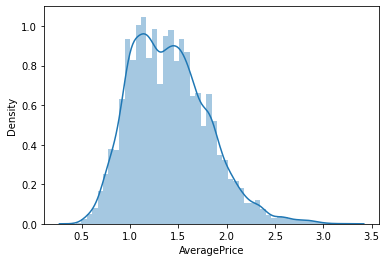

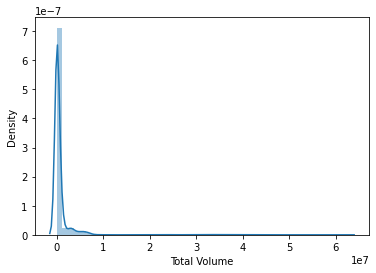

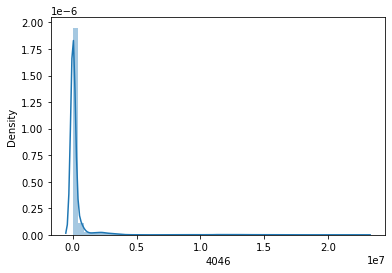

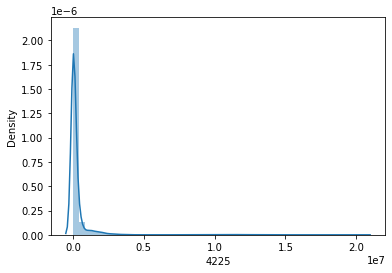

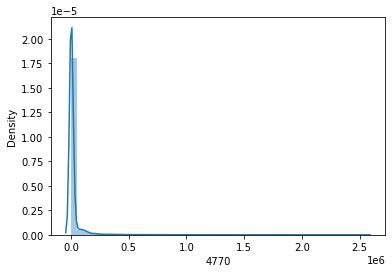

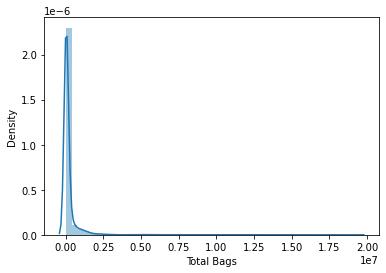

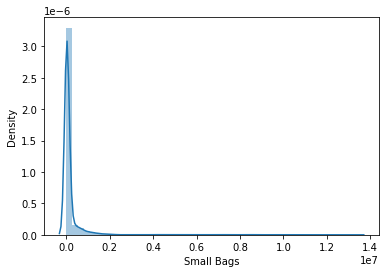

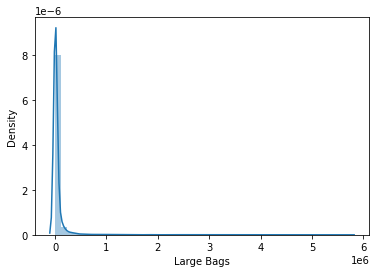

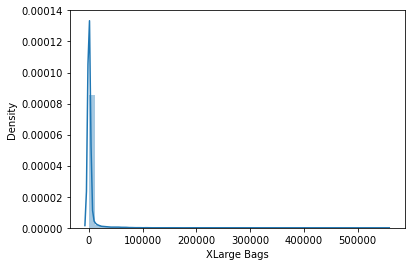

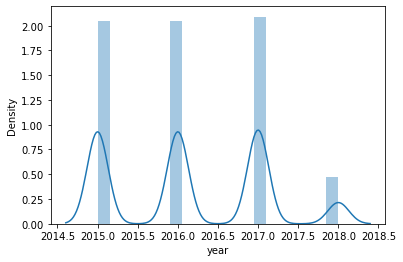

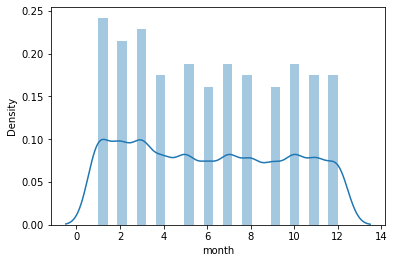

In [440]:
#Display distribution for all numerical columns.
for i in numerical_col:
    sns.distplot(df[i])
    plt.show()

Average price is close to normal distribution. Variables year and month are uniformly distributed, other features are mostly right skewed.

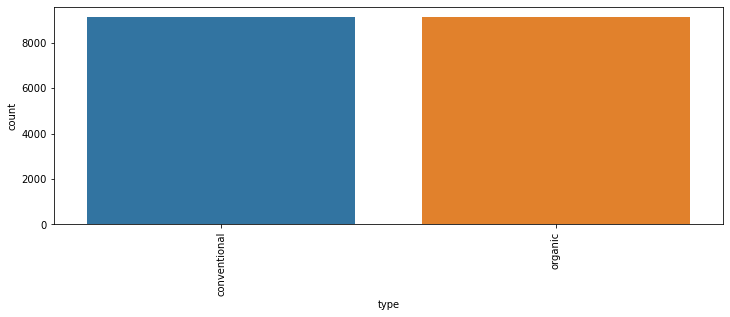

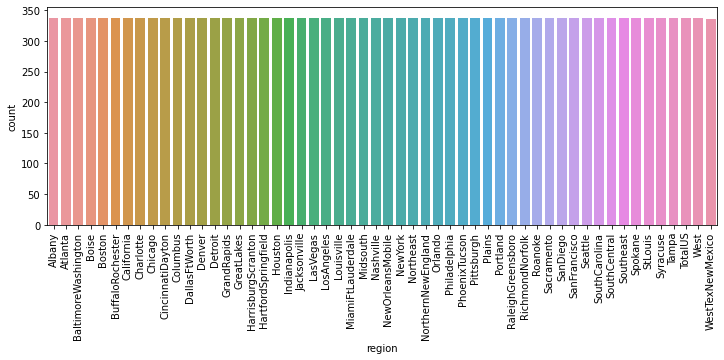

In [441]:
#Display value_counts of all categorical columns 
for i in categorical_col:
    plt.figure(figsize=(12,4))
    sns.countplot(df[i])
    plt.xticks(rotation=90)
    plt.show()

Looks like the features type and region have similar count. So for target variable region would not require any class balancing later on.

#### Bivariate Analysis

Bivariate analysis when target variable is region

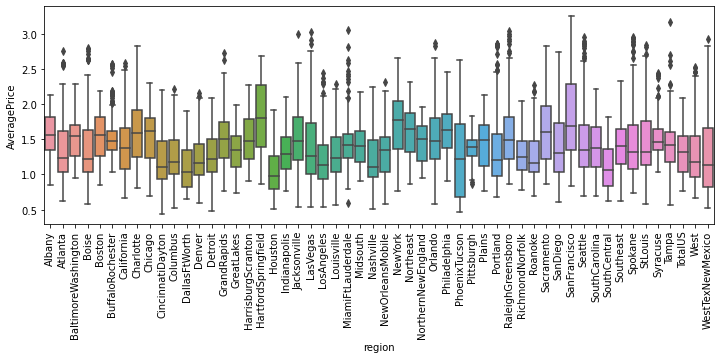

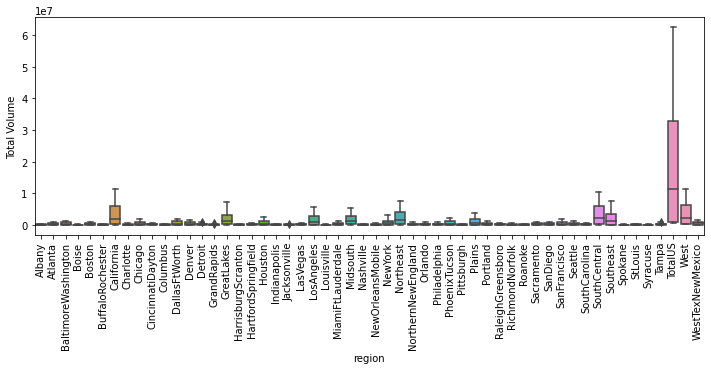

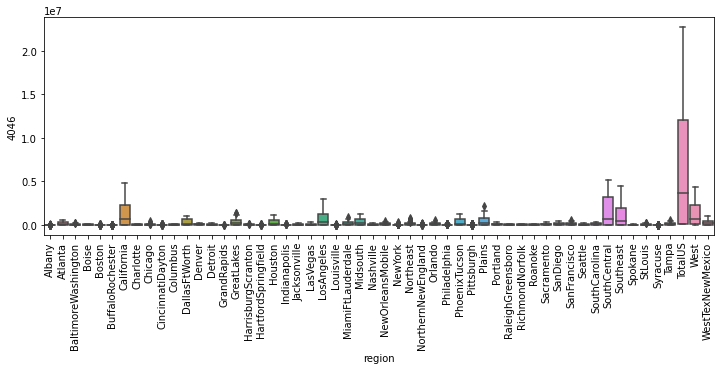

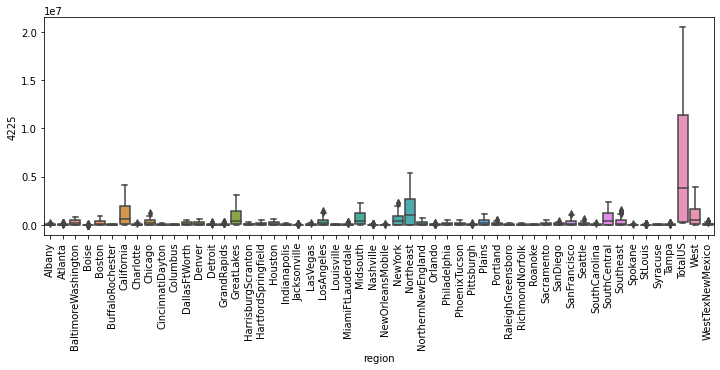

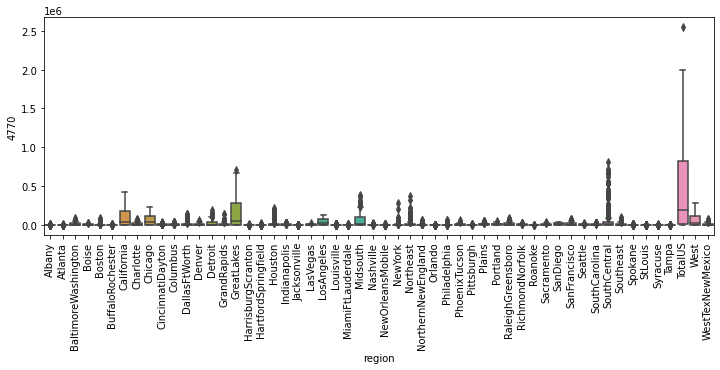

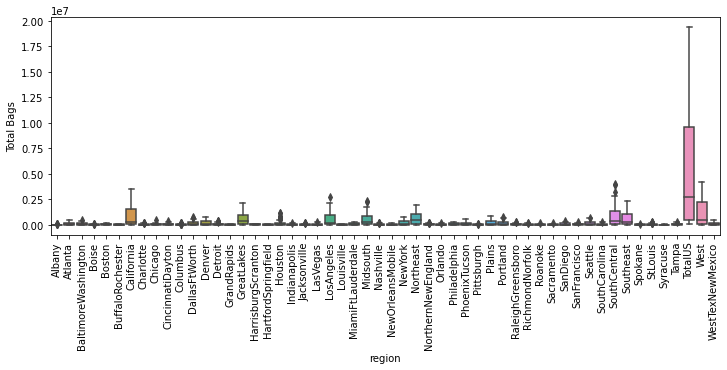

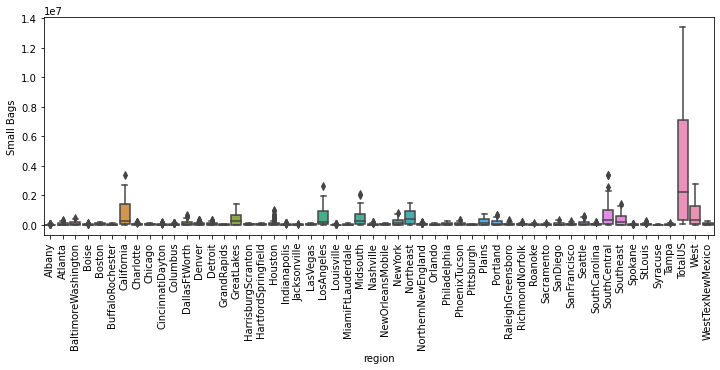

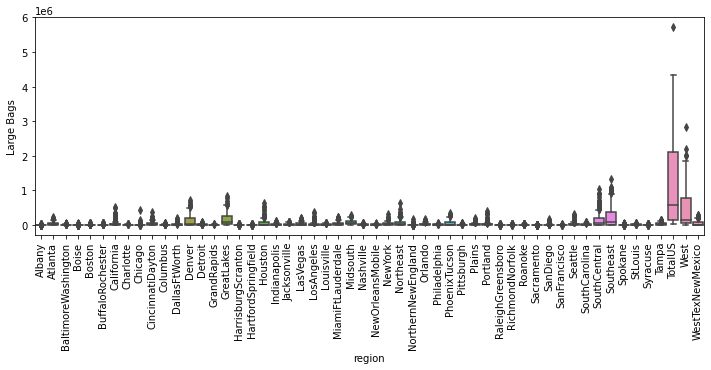

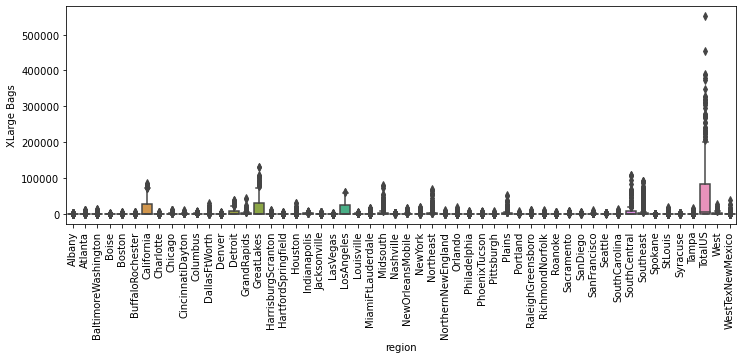

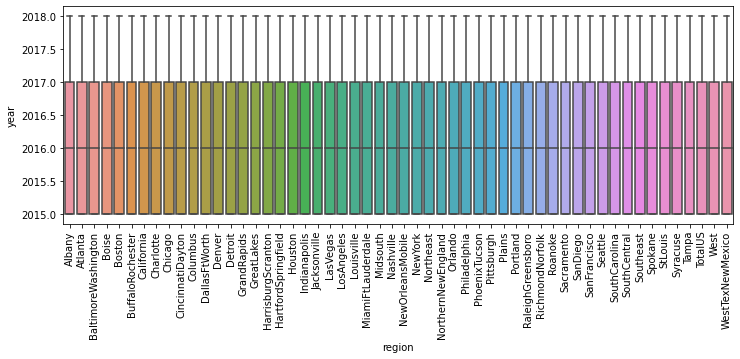

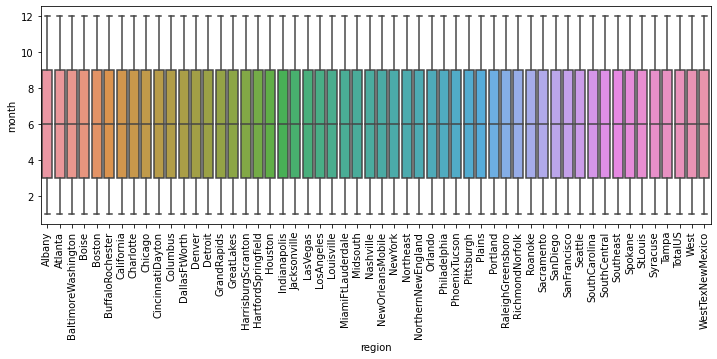

In [442]:
#For all numerical columns compare the value ranges for region
for i in numerical_col:
    plt.figure(figsize=(12,4))
    sns.boxplot(x=df['region'],y=df[i])
    plt.xticks(rotation=90)
    plt.show()

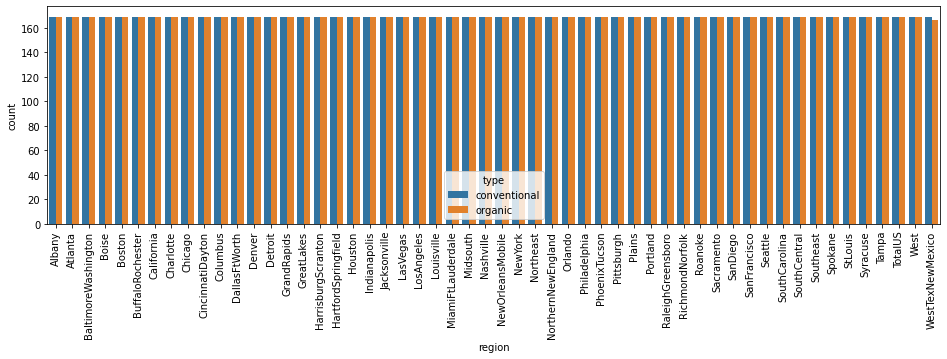

In [443]:
#type variable vs region variable, as there are only two variables in categorical list
for i in categorical_col[:-1]:
    plt.figure(figsize=(16,4))
    sns.countplot(hue=df[i],x=df['region'])
    plt.xticks(rotation=90)
    plt.show()

Bivariate Analysis when target variable is AveragePrice

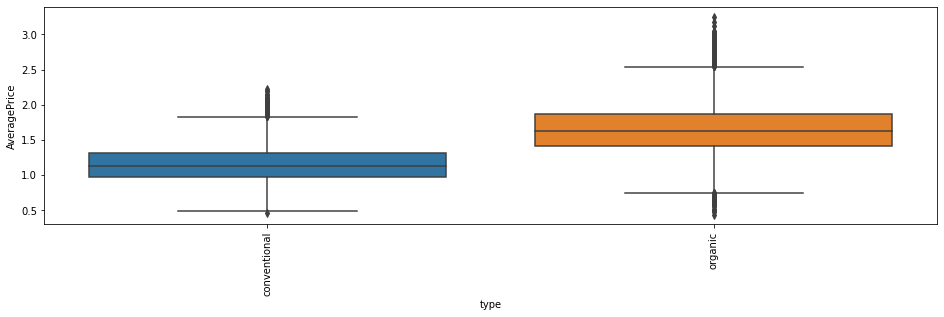

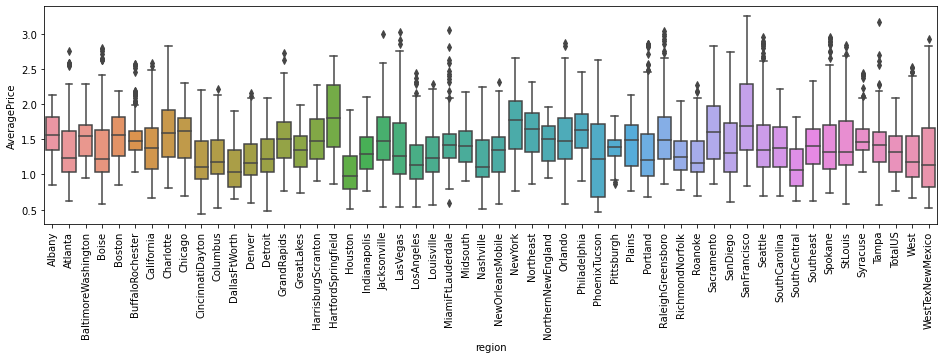

In [444]:
# For all categorical columns compare the values ranges of AveragePrice(target variable)
for i in categorical_col:
    plt.figure(figsize=(16,4))
    sns.boxplot(x=df[i],y=df['AveragePrice'])
    plt.xticks(rotation=90)
    plt.show()

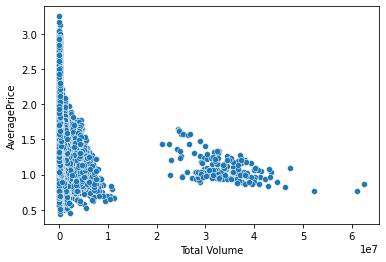

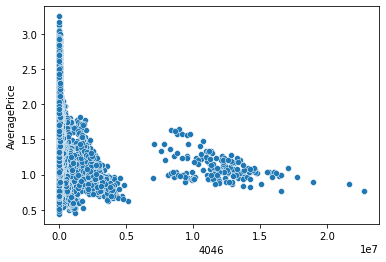

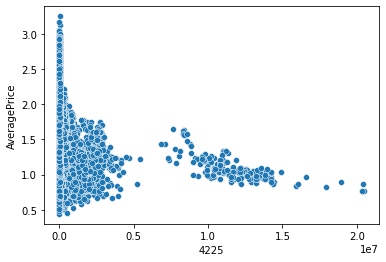

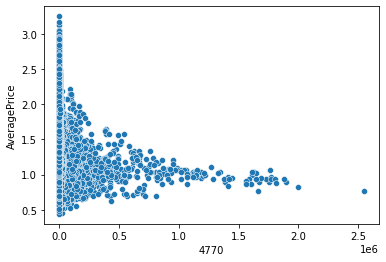

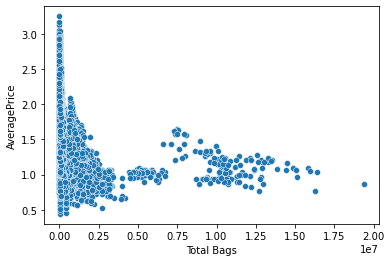

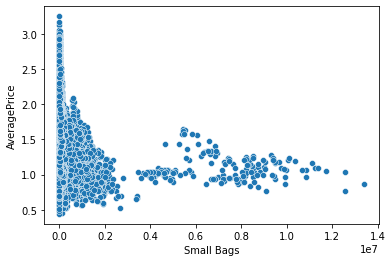

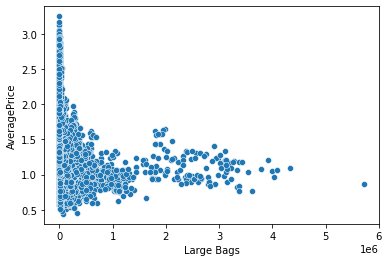

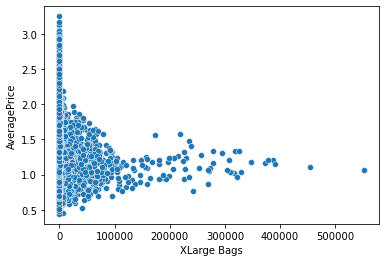

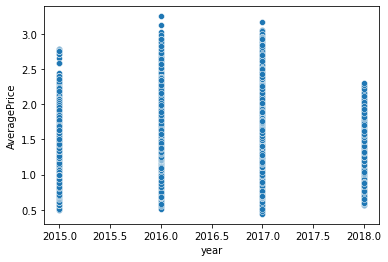

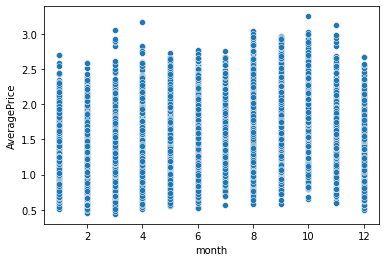

In [445]:
# for all numerical columns check how the average price vary
for i in numerical_col[1:]:
    sns.scatterplot(y=df['AveragePrice'],x=df[i])
    plt.show()

#### Multivariate Analysis

<AxesSubplot:>

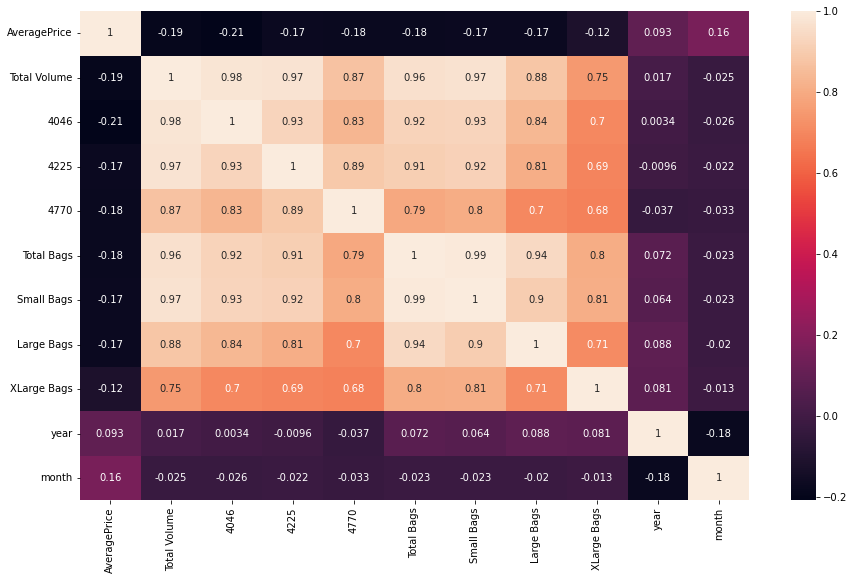

In [446]:
# Plot a heatmap using dataframe correlation values
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(),annot=True)

In [447]:
"""
# dropping column Total Volume,Total Bags and 4046 as they have high correlation with multiple other columns
df.drop(columns=['Total Volume'],inplace=True)
df.drop(columns=['4046'],inplace=True)
df.drop(columns=['Total Bags'],inplace=True)
"""

"\n# dropping column Total Volume,Total Bags and 4046 as they have high correlation with multiple other columns\ndf.drop(columns=['Total Volume'],inplace=True)\ndf.drop(columns=['4046'],inplace=True)\ndf.drop(columns=['Total Bags'],inplace=True)\n"

There are features which have high correlation with each other. We'll drop them later after checking the VIF score.

### Feature Engineering (Target variable- region)

In [448]:
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region',
       'month'],
      dtype='object')

In [449]:
#converting categorical features (apart from target variable) to numerical values
categorical_col

['type', 'region']

In [450]:
# map "conventional" to 0 and "organic" to 1
df['type']=df['type'].map({'conventional':0,'organic':1})

In [451]:
# Create X with all independent variables
X=df[['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'month']]
X

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,11
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,2
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,1


In [452]:
# Create y with only target variable(region)
y=df['region']
y

0                  Albany
1                  Albany
2                  Albany
3                  Albany
4                  Albany
               ...       
18244    WestTexNewMexico
18245    WestTexNewMexico
18246    WestTexNewMexico
18247    WestTexNewMexico
18248    WestTexNewMexico
Name: region, Length: 18249, dtype: object

In [453]:
#check VIF to reduce multicolliniarity
vif=pd.DataFrame()
vif["value"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['feature']=X.columns
vif.sort_values(by='value',ascending=False)

,value,feature
5,2.502000e+14,Total Bags
6,1.429714e+14,Small Bags
7,1.521486e+13,Large Bags
8,7.856737e+10,XLarge Bags
1,5.212518e+09,Total Volume
2,6.947116e+08,4046
3,6.333088e+08,4225
4,4.973456e+06,4770
0,2.288150e+01,AveragePrice
10,1.721352e+01,year


In [454]:
#Dropping column Total Bags as its vif value is very high
X.drop(columns=['Total Bags'],inplace=True)

In [455]:
#again check VIF to reduce multicolliniarity
vif=pd.DataFrame()
vif["value"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['feature']=X.columns
vif.sort_values(by='value',ascending=False)

,value,feature
1,5.212509e+09,Total Volume
2,6.947103e+08,4046
3,6.333076e+08,4225
5,2.431006e+08,Small Bags
6,2.574048e+07,Large Bags
4,4.973448e+06,4770
7,1.329126e+05,XLarge Bags
0,2.288143e+01,AveragePrice
9,1.721351e+01,year
10,4.239530e+00,month


In [456]:
#Dropping column Total Volume as its vif value is very high
X.drop(columns=['Total Volume'],inplace=True)

In [457]:
#again check VIF to reduce multicolliniarity
vif=pd.DataFrame()
vif["value"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['feature']=X.columns
vif.sort_values(by='value',ascending=False)

,value,feature
0,22.880257,AveragePrice
4,20.501088,Small Bags
8,17.213508,year
2,14.281368,4225
1,10.604722,4046
5,5.816839,Large Bags
3,5.614326,4770
9,4.238918,month
6,3.518672,XLarge Bags
7,3.393349,type


In [458]:
#Dropping column AveragePrice as its vif value is very high
X.drop(columns=['AveragePrice'],inplace=True)

In [459]:
#again check VIF to reduce multicolliniarity
vif=pd.DataFrame()
vif["value"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['feature']=X.columns
vif.sort_values(by='value',ascending=False)

,value,feature
3,20.493060,Small Bags
1,14.116072,4225
0,10.445538,4046
4,5.805552,Large Bags
2,5.591415,4770
7,5.347940,year
8,4.061818,month
5,3.509960,XLarge Bags
6,2.116273,type


In [460]:
#Dropping column Small Bags as its vif value is very high
X.drop(columns=['Small Bags'],inplace=True)

In [461]:
#again check VIF to reduce multicolliniarity
vif=pd.DataFrame()
vif["value"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['feature']=X.columns
vif.sort_values(by='value',ascending=False)

,value,feature
1,11.282231,4225
0,8.961989,4046
6,5.343801,year
2,5.338587,4770
3,4.137485,Large Bags
7,4.061171,month
4,2.416214,XLarge Bags
5,2.116270,type


We have removed all the columns which had multicollinearity.

In [462]:
#Feature scaling of X
ss=StandardScaler()

In [463]:
# Apply standard scaler on only relevant columns
X[['4225', '4046', '4770', 'Large Bags', 'XLarge Bags', 'year', 'month']]=ss.fit_transform(X[['4225', '4046', '4770', 'Large Bags', 'XLarge Bags', 'year', 'month']])
X

,4046,4225,4770,Large Bags,XLarge Bags,type,year,month
0,-0.230816,-0.199902,-0.212091,-0.222352,-0.17558,0,-1.221282,1.647632
1,-0.231103,-0.208054,-0.211997,-0.222335,-0.17558,0,-1.221282,1.647632
2,-0.231007,-0.154478,-0.211325,-0.222311,-0.17558,0,-1.221282,1.647632
3,-0.230741,-0.185350,-0.211864,-0.222186,-0.17558,0,-1.221282,1.647632
4,-0.230891,-0.208719,-0.211834,-0.221924,-0.17558,0,-1.221282,1.364669
...,...,...,...,...,...,...,...,...
18244,-0.230017,-0.243857,-0.212540,-0.220964,-0.17558,1,1.970504,-1.181997
18245,-0.230693,-0.242277,-0.212540,-0.221403,-0.17558,1,1.970504,-1.464959
18246,-0.230693,-0.243090,-0.205766,-0.222561,-0.17558,1,1.970504,-1.464959
18247,-0.230428,-0.242651,-0.205774,-0.222529,-0.17558,1,1.970504,-1.464959


In [464]:
y.value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

region values seems balanced, so no need for oversampling

### Model Building

In [465]:
#Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=80)

In [466]:
X_train

,4046,4225,4770,Large Bags,XLarge Bags,type,year,month
886,-0.228126,-0.090196,-0.209442,-0.219695,-0.175580,0,-1.221282,1.647632
8344,10.053276,8.916349,7.436407,12.149332,20.936495,0,0.906575,0.232818
15157,-0.231398,-0.241741,-0.206969,-0.222128,-0.175580,1,0.906575,-1.181997
9401,-0.231621,-0.245011,-0.212540,-0.222734,-0.175580,1,-1.221282,0.798743
3144,1.665161,1.513381,2.509756,0.218079,1.720257,0,-0.157353,0.232818
...,...,...,...,...,...,...,...,...
15154,-0.231456,-0.241402,-0.207054,-0.222734,-0.175580,1,0.906575,-0.899034
8714,-0.180822,-0.175472,-0.132584,-0.161722,-0.175013,0,1.970504,-1.464959
2259,-0.075478,-0.085607,-0.101963,-0.222371,-0.175580,0,-1.221282,0.232818
5308,-0.204627,-0.239751,-0.212388,-0.144427,-0.175580,0,-0.157353,1.364669


In [467]:
X_test

,4046,4225,4770,Large Bags,XLarge Bags,type,year,month
14227,-0.231317,-0.242968,-0.209714,-0.215808,-0.175580,1,-0.157353,1.364669
11002,-0.230873,-0.237386,-0.212462,-0.179110,-0.175580,1,-1.221282,1.364669
1584,-0.229176,0.038816,-0.069495,-0.222616,-0.175580,0,-1.221282,0.232818
11825,0.007552,-0.029789,-0.158080,-0.045477,-0.175580,1,-1.221282,-1.181997
4137,0.300774,1.009384,1.781127,0.100449,1.074803,0,-0.157353,-0.050145
...,...,...,...,...,...,...,...,...
2289,-0.140405,-0.211964,-0.154433,-0.202848,-0.175138,0,-1.221282,1.647632
13149,-0.231635,-0.243923,-0.212540,-0.217420,-0.175580,1,-0.157353,0.515780
14775,-0.231565,-0.244865,-0.212540,-0.222734,-0.175580,1,0.906575,-0.333108
16295,-0.219391,-0.209914,-0.210606,-0.189898,-0.175580,1,0.906575,0.798743


In [468]:
y_train

886      HartfordSpringfield
8344                 TotalUS
15157              Charlotte
9401        BuffaloRochester
3144              California
                ...         
15154              Charlotte
8714            Indianapolis
2259                 Seattle
5308                 StLouis
17583       WestTexNewMexico
Name: region, Length: 13686, dtype: object

In [469]:
y_test

14227         SouthCarolina
11002              Portland
1584     NorthernNewEngland
11825               TotalUS
4137               Midsouth
                ...        
2289          SouthCarolina
13149            Louisville
14775                Albany
16295             Northeast
4707               Portland
Name: region, Length: 4563, dtype: object

#### Logistic Regression

In [470]:
# Fit the Logistic Regression model
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [471]:
#Predict on train data
y_train_pred=lr.predict(X_train)
y_train_pred

array(['HartfordSpringfield', 'TotalUS', 'Charlotte', ..., 'Sacramento',
       'Spokane', 'Charlotte'], dtype=object)

In [472]:
# Print the accuracy on train data
accuracy_score(y_train,y_train_pred)

0.2863510156364168

In [473]:
#Predict on test data
y_test_pred=lr.predict(X_test)
y_test_pred

array(['Chicago', 'Southeast', 'Boston', ..., 'Charlotte', 'Northeast',
       'SanDiego'], dtype=object)

In [474]:
# Print the confusion matrix which has the TruePositive, FalsePositive, FalseNegative and TrueNegative counts 
confusion_matrix(y_test,y_test_pred)

array([[ 9,  0,  0, ...,  0,  0,  0],
       [ 0, 23,  0, ...,  0,  0,  0],
       [ 0,  0, 23, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 72,  9,  0],
       [ 0,  0,  0, ...,  3, 46,  0],
       [ 0,  0,  0, ...,  0,  0, 17]], dtype=int64)

In [475]:
# Print the accuracy on test data
accuracy_score(y_test,y_test_pred)

0.25443786982248523

#### Random Forest

As we have limited features and Random Forest is immune from multicollinearity we'll use all features

In [476]:
# Create X with all independent variables
X=df[['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'month']]
X

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,11
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,2
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,1


In [477]:
y

0                  Albany
1                  Albany
2                  Albany
3                  Albany
4                  Albany
               ...       
18244    WestTexNewMexico
18245    WestTexNewMexico
18246    WestTexNewMexico
18247    WestTexNewMexico
18248    WestTexNewMexico
Name: region, Length: 18249, dtype: object

In [478]:
#Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=80)

In [479]:
# Fit the Random Forest Classifier model
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [480]:
#Predict on train data
y_train_pred=rf.predict(X_train)
y_train_pred

array(['HartfordSpringfield', 'TotalUS', 'Charlotte', ..., 'Seattle',
       'StLouis', 'WestTexNewMexico'], dtype=object)

In [481]:
# Print the accuracy on train data
accuracy_score(y_train,y_train_pred)

1.0

In [482]:
# Predict on test data
y_test_pred=rf.predict(X_test)
y_test_pred

array(['SouthCarolina', 'Portland', 'NorthernNewEngland', ..., 'Albany',
       'Northeast', 'Portland'], dtype=object)

In [483]:
# Print the confusion matrix on test data
confusion_matrix(y_test,y_test_pred)

array([[84,  0,  0, ...,  0,  0,  0],
       [ 0, 76,  0, ...,  0,  0,  0],
       [ 0,  0, 89, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 83,  0,  0],
       [ 0,  0,  0, ...,  2, 78,  0],
       [ 0,  1,  0, ...,  0,  0, 69]], dtype=int64)

In [484]:
# Print the accuracy on test data
accuracy_score(y_test,y_test_pred)

0.8996274380889766

The random forest classifier has better accuracy score then Logistic regression model.
But in Random forest model as we can see the train accuracy score is 100% but the test accuracy score is slightly low, this means model is overfitting.

Let's do hyperparameter tuning to handle overfitting

#### Hyperparameter tuning

In [485]:
param_grid = {
    #'bootstrap': [True],
    #'max_depth': [16, 18, 20],
    'max_depth': [20],
    #'min_samples_split': [3, 4, 5],
    #'min_samples_leaf': [1, 2, 3],
    #'max_features': [0.3, 0.4, 0.5],
    #'max_features': ["auto", "sqrt", "log2"],
    'max_features': ["auto"],
    #'n_estimators': [50, 100, 150, 200]
    'n_estimators': [150]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5, n_jobs = 1, verbose = 10)

In [486]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START max_depth=20, max_features=auto, n_estimators=150...........
[CV 1/5; 1/1] END max_depth=20, max_features=auto, n_estimators=150;, score=0.898 total time=   6.6s
[CV 2/5; 1/1] START max_depth=20, max_features=auto, n_estimators=150...........
[CV 2/5; 1/1] END max_depth=20, max_features=auto, n_estimators=150;, score=0.899 total time=   5.4s
[CV 3/5; 1/1] START max_depth=20, max_features=auto, n_estimators=150...........
[CV 3/5; 1/1] END max_depth=20, max_features=auto, n_estimators=150;, score=0.894 total time=   7.6s
[CV 4/5; 1/1] START max_depth=20, max_features=auto, n_estimators=150...........
[CV 4/5; 1/1] END max_depth=20, max_features=auto, n_estimators=150;, score=0.903 total time=   5.2s
[CV 5/5; 1/1] START max_depth=20, max_features=auto, n_estimators=150...........
[CV 5/5; 1/1] END max_depth=20, max_features=auto, n_estimators=150;, score=0.905 total time=   5.4s


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'max_depth': [20], 'max_features': ['auto'],
                         'n_estimators': [150]},
             verbose=10)

In [487]:
best_params=grid_search.best_params_
print(best_params)

{'max_depth': 20, 'max_features': 'auto', 'n_estimators': 150}


In [488]:
#Fit the random forest classifier model
rf=RandomForestClassifier(**best_params)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=20, n_estimators=150)

In [489]:
#Predict on train data
y_train_pred=rf.predict(X_train)
y_train_pred

array(['HartfordSpringfield', 'TotalUS', 'Charlotte', ..., 'Seattle',
       'StLouis', 'WestTexNewMexico'], dtype=object)

In [490]:
# Print the accuracy on train data
accuracy_score(y_train,y_train_pred)

0.9965658336986701

In [491]:
# Predict on test data
y_test_pred=rf.predict(X_test)
y_test_pred

array(['SouthCarolina', 'Portland', 'Boston', ..., 'Albany', 'Northeast',
       'Portland'], dtype=object)

In [492]:
# Print the confusion matrix on test data
confusion_matrix(y_test,y_test_pred)

array([[86,  0,  0, ...,  0,  0,  0],
       [ 0, 78,  0, ...,  0,  0,  0],
       [ 0,  0, 90, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 83,  0,  0],
       [ 0,  0,  0, ...,  2, 78,  0],
       [ 0,  1,  0, ...,  0,  0, 68]], dtype=int64)

In [493]:
# Print the accuracy on test data
accuracy_score(y_test,y_test_pred)

0.8994082840236687

##### After hyperparameter tuning there isn't much change in the train and test accuracy. As the test accuracy is almost 90% we can treat this a a good predictive model

In [494]:
# Saving the best model
pickle.dump(rf, open('model_avacado_classification.pkl', 'wb'))

### Feature Engineering (Target variable- AveragePrice)

In [495]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,Albany,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,Albany,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,Albany,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,Albany,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,Albany,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,WestTexNewMexico,2
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,WestTexNewMexico,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,WestTexNewMexico,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,WestTexNewMexico,1


In [496]:
#converting categorical feature region to numerical values
#one hot encoding of the region column
dfRegion=pd.get_dummies(df['region'],prefix="region")
dfRegion

,region_Albany,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,region_BuffaloRochester,region_California,region_Charlotte,region_Chicago,region_CincinnatiDayton,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18246,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18247,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [497]:
# Concatenate the original dataframe with dataframe created for region values
df=pd.concat([df,dfRegion],axis=1)
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,...,0,0,0,0,0,0,0,0,0,1
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,...,0,0,0,0,0,0,0,0,0,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,...,0,0,0,0,0,0,0,0,0,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,...,0,0,0,0,0,0,0,0,0,1


In [498]:
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region',
       'month', 'region_Albany', 'region_Atlanta',
       'region_BaltimoreWashington', 'region_Boise', 'region_Boston',
       'region_BuffaloRochester', 'region_California', 'region_Charlotte',
       'region_Chicago', 'region_CincinnatiDayton', 'region_Columbus',
       'region_DallasFtWorth', 'region_Denver', 'region_Detroit',
       'region_GrandRapids', 'region_GreatLakes', 'region_HarrisburgScranton',
       'region_HartfordSpringfield', 'region_Houston', 'region_Indianapolis',
       'region_Jacksonville', 'region_LasVegas', 'region_LosAngeles',
       'region_Louisville', 'region_MiamiFtLauderdale', 'region_Midsouth',
       'region_Nashville', 'region_NewOrleansMobile', 'region_NewYork',
       'region_Northeast', 'region_NorthernNewEngland', 'region_Orlando',
       'region_Philadelphia', 'region_PhoenixTucson', 'region_Pitt

In [499]:
# Create X with all independent variable
X=df[['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags',
       'type', 'year', 'month', 'region_Albany', 'region_Atlanta',
       'region_BaltimoreWashington', 'region_Boise', 'region_Boston',
       'region_BuffaloRochester', 'region_California', 'region_Charlotte',
       'region_Chicago', 'region_CincinnatiDayton', 'region_Columbus',
       'region_DallasFtWorth', 'region_Denver', 'region_Detroit',
       'region_GrandRapids', 'region_GreatLakes', 'region_HarrisburgScranton',
       'region_HartfordSpringfield', 'region_Houston', 'region_Indianapolis',
       'region_Jacksonville', 'region_LasVegas', 'region_LosAngeles',
       'region_Louisville', 'region_MiamiFtLauderdale', 'region_Midsouth',
       'region_Nashville', 'region_NewOrleansMobile', 'region_NewYork',
       'region_Northeast', 'region_NorthernNewEngland', 'region_Orlando',
       'region_Philadelphia', 'region_PhoenixTucson', 'region_Pittsburgh',
       'region_Plains', 'region_Portland', 'region_RaleighGreensboro',
       'region_RichmondNorfolk', 'region_Roanoke', 'region_Sacramento',
       'region_SanDiego', 'region_SanFrancisco', 'region_Seattle',
       'region_SouthCarolina', 'region_SouthCentral', 'region_Southeast',
       'region_Spokane', 'region_StLouis', 'region_Syracuse', 'region_Tampa',
       'region_TotalUS', 'region_West', 'region_WestTexNewMexico']]
X

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,...,0,0,0,0,0,0,0,0,0,0
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,...,0,0,0,0,0,0,0,0,0,0
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,...,0,0,0,0,0,0,0,0,0,0
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,...,0,0,0,0,0,0,0,0,0,0
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,...,0,0,0,0,0,0,0,0,0,1
18245,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,...,0,0,0,0,0,0,0,0,0,1
18246,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,...,0,0,0,0,0,0,0,0,0,1
18247,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,...,0,0,0,0,0,0,0,0,0,1


In [500]:
# Create y with only target variable(AveragePrice)
y=df["AveragePrice"]
y

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 18249, dtype: float64

In [501]:
#Feature scaling
ss=StandardScaler()

In [502]:
# Apply standard scaler on only relevant columns
X[['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'month']]=ss.fit_transform(X[['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'month']])
X

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,-0.227716,-0.230816,-0.199902,-0.212091,-0.234170,-0.232647,-0.222352,-0.17558,0,-1.221282,...,0,0,0,0,0,0,0,0,0,0
1,-0.230427,-0.231103,-0.208054,-0.211997,-0.233350,-0.231568,-0.222335,-0.17558,0,-1.221282,...,0,0,0,0,0,0,0,0,0,0
2,-0.212085,-0.231007,-0.154478,-0.211325,-0.234730,-0.233399,-0.222311,-0.17558,0,-1.221282,...,0,0,0,0,0,0,0,0,0,0
3,-0.223444,-0.230741,-0.185350,-0.211864,-0.237096,-0.236568,-0.222186,-0.17558,0,-1.221282,...,0,0,0,0,0,0,0,0,0,0
4,-0.231538,-0.230891,-0.208719,-0.211834,-0.236718,-0.236154,-0.221924,-0.17558,0,-1.221282,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,-0.241373,-0.230017,-0.243857,-0.212540,-0.229301,-0.226665,-0.220964,-0.17558,1,1.970504,...,0,0,0,0,0,0,0,0,0,1
18245,-0.242296,-0.230693,-0.242277,-0.212540,-0.233594,-0.232196,-0.221403,-0.17558,1,1.970504,...,0,0,0,0,0,0,0,0,0,1
18246,-0.242331,-0.230693,-0.243090,-0.205766,-0.233463,-0.231644,-0.222561,-0.17558,1,1.970504,...,0,0,0,0,0,0,0,0,0,1
18247,-0.241625,-0.230428,-0.242651,-0.205774,-0.231866,-0.229543,-0.222529,-0.17558,1,1.970504,...,0,0,0,0,0,0,0,0,0,1


In [503]:
#check VIF to reduce multicolliniarity
vif=pd.DataFrame()
vif["value"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['feature']=X.columns
vif.sort_values(by='value',ascending=False)

,value,feature
4,2.370316e+14,Total Bags
5,1.364727e+14,Small Bags
6,1.455121e+13,Large Bags
7,7.646958e+10,XLarge Bags
0,5.191406e+09,Total Volume
...,...,...
34,1.018888e+00,region_Louisville
50,1.018805e+00,region_Roanoke
60,1.018785e+00,region_Syracuse
58,1.018713e+00,region_Spokane


In [504]:
#Dropping column Total Bags as its vif value is very high
X.drop(columns=['Total Bags'],inplace=True)

In [505]:
#again check VIF to reduce multicolliniarity
vif=pd.DataFrame()
vif["value"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['feature']=X.columns
vif.sort_values(by='value',ascending=False)

,value,feature
0,5.191347e+09,Total Volume
1,6.965016e+08,4046
2,6.310801e+08,4225
4,2.423517e+08,Small Bags
5,2.590541e+07,Large Bags
...,...,...
33,1.018888e+00,region_Louisville
49,1.018774e+00,region_Roanoke
59,1.018735e+00,region_Syracuse
57,1.018712e+00,region_Spokane


In [506]:
#Dropping column Total Volume as its vif value is very high
X.drop(columns=['Total Volume'],inplace=True)

In [507]:
#again check VIF to reduce multicolliniarity
vif=pd.DataFrame()
vif["value"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['feature']=X.columns
vif.sort_values(by='value',ascending=False)

,value,feature
3,22.210560,Small Bags
1,18.352381,4225
0,14.534447,4046
4,7.216957,Large Bags
2,6.198371,4770
...,...,...
14,1.018763,region_BuffaloRochester
48,1.018632,region_Roanoke
58,1.018596,region_Syracuse
56,1.018569,region_Spokane


In [508]:
#Dropping column Small Bags as its vif value is very high
X.drop(columns=['Small Bags'],inplace=True)

In [509]:
#again check VIF to reduce multicolliniarity
vif=pd.DataFrame()
vif["value"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['feature']=X.columns
vif.sort_values(by='value',ascending=False)

,value,feature
1,16.656507,4225
0,12.553298,4046
2,6.032130,4770
3,4.914266,Large Bags
4,2.544107,XLarge Bags
...,...,...
47,1.018611,region_Roanoke
57,1.018593,region_Syracuse
31,1.018576,region_Louisville
55,1.018565,region_Spokane


In [510]:
#Dropping column 4225 as its vif value is very high
X.drop(columns=['4225'],inplace=True)

In [511]:
#again check VIF to reduce multicolliniarity
vif=pd.DataFrame()
vif["value"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['feature']=X.columns
vif.sort_values(by='value',ascending=False)

,value,feature
0,7.300057,4046
2,4.767263,Large Bags
1,4.151961,4770
3,2.530521,XLarge Bags
58,1.961476,region_TotalUS
...,...,...
54,1.018562,region_Spokane
30,1.018561,region_Louisville
12,1.018553,region_BuffaloRochester
39,1.018540,region_Philadelphia


We have removed all the columns which had multicollinearity.

### Model Building

In [512]:
#Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=80)

In [513]:
X_train

,4046,4770,Large Bags,XLarge Bags,type,year,month,region_Albany,region_Atlanta,region_BaltimoreWashington,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
886,-0.228126,-0.209442,-0.219695,-0.175580,0,-1.221282,1.647632,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8344,10.053276,7.436407,12.149332,20.936495,0,0.906575,0.232818,0,0,0,...,0,0,0,0,0,0,0,1,0,0
15157,-0.231398,-0.206969,-0.222128,-0.175580,1,0.906575,-1.181997,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9401,-0.231621,-0.212540,-0.222734,-0.175580,1,-1.221282,0.798743,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3144,1.665161,2.509756,0.218079,1.720257,0,-0.157353,0.232818,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15154,-0.231456,-0.207054,-0.222734,-0.175580,1,0.906575,-0.899034,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8714,-0.180822,-0.132584,-0.161722,-0.175013,0,1.970504,-1.464959,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2259,-0.075478,-0.101963,-0.222371,-0.175580,0,-1.221282,0.232818,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5308,-0.204627,-0.212388,-0.144427,-0.175580,0,-0.157353,1.364669,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [514]:
X_test

,4046,4770,Large Bags,XLarge Bags,type,year,month,region_Albany,region_Atlanta,region_BaltimoreWashington,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
14227,-0.231317,-0.209714,-0.215808,-0.175580,1,-0.157353,1.364669,0,0,0,...,1,0,0,0,0,0,0,0,0,0
11002,-0.230873,-0.212462,-0.179110,-0.175580,1,-1.221282,1.364669,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1584,-0.229176,-0.069495,-0.222616,-0.175580,0,-1.221282,0.232818,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11825,0.007552,-0.158080,-0.045477,-0.175580,1,-1.221282,-1.181997,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4137,0.300774,1.781127,0.100449,1.074803,0,-0.157353,-0.050145,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2289,-0.140405,-0.154433,-0.202848,-0.175138,0,-1.221282,1.647632,0,0,0,...,1,0,0,0,0,0,0,0,0,0
13149,-0.231635,-0.212540,-0.217420,-0.175580,1,-0.157353,0.515780,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14775,-0.231565,-0.212540,-0.222734,-0.175580,1,0.906575,-0.333108,1,0,0,...,0,0,0,0,0,0,0,0,0,0
16295,-0.219391,-0.210606,-0.189898,-0.175580,1,0.906575,0.798743,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [515]:
y_train

886      1.24
8344     1.17
15157    1.67
9401     1.55
3144     1.08
         ... 
15154    1.86
8714     0.92
2259     1.25
5308     1.16
17583    1.76
Name: AveragePrice, Length: 13686, dtype: float64

In [516]:
y_test

14227    1.73
11002    1.38
1584     1.10
11825    1.36
4137     1.14
         ... 
2289     1.04
13149    1.32
14775    1.79
16295    1.92
4707     0.86
Name: AveragePrice, Length: 4563, dtype: float64

#### Linear Regression

In [517]:
# Fit the Linear Regression model
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [518]:
# Predict on train data
y_train_pred=lr.predict(X_train)
y_train_pred

array([1.63742074, 1.34328121, 1.80839989, ..., 1.17447203, 1.24899563,
       1.5203335 ])

In [519]:
# Display the mean squared error on train data
mean_squared_error(y_train,y_train_pred)

0.06523658692771378

In [520]:
# Display the R2 score on train data
r2_score(y_train,y_train_pred)

0.5932943755025942

In [521]:
# Predict on test data
y_test_pred=lr.predict(X_test)
y_test_pred

array([1.74665478, 1.59606799, 1.19388175, ..., 1.8219561 , 1.95001045,
       1.05406523])

In [522]:
# Display the mean squared error on test data
mean_squared_error(y_test,y_test_pred)

0.07018085434353535

In [523]:
# Display the R2 score on test data
r2_score(y_test,y_test_pred)

0.580567943608064

<AxesSubplot:xlabel='AveragePrice'>

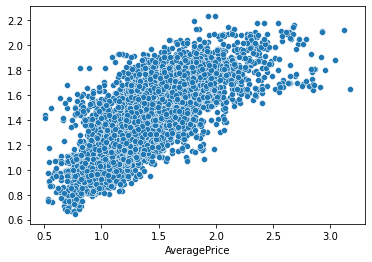

In [524]:
# Plot actual value vs predicted value to visually see how good the predictions are
sns.scatterplot(x=y_test,y=y_test_pred)

#### Random Forest

In [525]:
# Fit the Random Forest Regressor model
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [526]:
# Predict on train data
y_train_pred=rf.predict(X_train)
y_train_pred

array([1.2415, 1.205 , 1.7113, ..., 1.2328, 1.1854, 1.708 ])

In [527]:
# Display the mean squared error on train data
mean_squared_error(y_train,y_train_pred)

0.0026941583774896726

In [528]:
# Display the R2 score on train data
r2_score(y_train,y_train_pred)

0.9832037600828812

In [529]:
# Predict on test data
y_test_pred=rf.predict(X_test)
y_test_pred

array([1.6357, 1.4582, 1.1024, ..., 1.7788, 1.8662, 0.8408])

In [530]:
# Display the mean squared error on test data
mean_squared_error(y_test,y_test_pred)

0.019983345937202027

In [531]:
# Display the R2 score on test data
r2_score(y_test,y_test_pred)

0.8805706205996885

<AxesSubplot:xlabel='AveragePrice'>

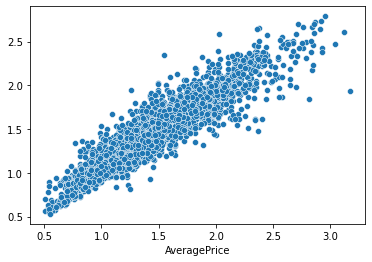

In [532]:
sns.scatterplot(x=y_test,y=y_test_pred)

Let's do hyperparameter tuning to handle overfitting

#### Hyperparameter tuning

In [533]:
param_grid = {
    #'bootstrap': [True],
    #'max_depth': [20, 25, 30],
    #'min_samples_split': [3, 4, 5],
    #'min_samples_leaf': [1, 2, 3],
    #'max_features': [0.3, 0.4, 0.5],
    #'max_features': ["auto", "sqrt", "log2"],
    'max_features': ["sqrt"],
    #'n_estimators': [200, 250, 300]
    'n_estimators': [200]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5, n_jobs = 1, verbose = 10)

In [534]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START max_features=sqrt, n_estimators=200.........................
[CV 1/5; 1/1] END max_features=sqrt, n_estimators=200;, score=0.864 total time=   3.2s
[CV 2/5; 1/1] START max_features=sqrt, n_estimators=200.........................
[CV 2/5; 1/1] END max_features=sqrt, n_estimators=200;, score=0.883 total time=   3.0s
[CV 3/5; 1/1] START max_features=sqrt, n_estimators=200.........................
[CV 3/5; 1/1] END max_features=sqrt, n_estimators=200;, score=0.880 total time=   3.0s
[CV 4/5; 1/1] START max_features=sqrt, n_estimators=200.........................
[CV 4/5; 1/1] END max_features=sqrt, n_estimators=200;, score=0.874 total time=   2.6s
[CV 5/5; 1/1] START max_features=sqrt, n_estimators=200.........................
[CV 5/5; 1/1] END max_features=sqrt, n_estimators=200;, score=0.874 total time=   2.6s


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
             param_grid={'max_features': ['sqrt'], 'n_estimators': [200]},
             verbose=10)

In [535]:
best_params=grid_search.best_params_
print(best_params)

{'max_features': 'sqrt', 'n_estimators': 200}


In [536]:
#Fit the random forest classifier model
rf=RandomForestRegressor(**best_params)
rf.fit(X_train,y_train)

RandomForestRegressor(max_features='sqrt', n_estimators=200)

In [537]:
# Predict on train data
y_train_pred=rf.predict(X_train)
y_train_pred

array([1.23265, 1.185  , 1.7261 , ..., 1.22545, 1.18025, 1.6849 ])

In [538]:
# Display the mean squared error on train data
mean_squared_error(y_train,y_train_pred)

0.0025910112187956733

In [539]:
# Display the R2 score on train data
r2_score(y_train,y_train_pred)

0.9838468122652135

In [540]:
# Predict on test data
y_test_pred=rf.predict(X_test)
y_test_pred

array([1.65145, 1.51115, 1.0946 , ..., 1.71825, 1.83025, 0.91055])

In [541]:
# Display the mean squared error on test data
mean_squared_error(y_test,y_test_pred)

0.019524338236539054

In [542]:
# Display the R2 score on test data
r2_score(y_test,y_test_pred)

0.8833138551412119

<AxesSubplot:xlabel='AveragePrice'>

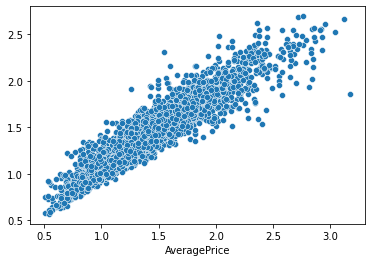

In [543]:
sns.scatterplot(x=y_test,y=y_test_pred)

##### After hyperparameter tuning there is a slight increase in the test R2 score.

In [544]:
# Saving the best model
pickle.dump(rf, open('model_avacado_regression.pkl', 'wb'))